In [2]:
# Step 0: Imports and Setup

import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
from src.data_utils import load_data, clean_columns, export_cleaned, summarize_missing
from src.eda_utils import *

# Load Sierra Leone data
df = load_data("../data/sierraleone-bumbuna.csv")
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Step A: Summary Stats and Missing Values
df.describe()
summarize_missing(df)


Comments         100.0
WSstdev            0.0
TModB              0.0
TModA              0.0
Precipitation      0.0
Cleaning           0.0
BP                 0.0
WDstdev            0.0
WD                 0.0
Timestamp          0.0
GHI                0.0
WS                 0.0
RH                 0.0
Tamb               0.0
ModB               0.0
ModA               0.0
DHI                0.0
DNI                0.0
WSgust             0.0
dtype: float64

In [4]:
# Step B: Outlier Detection & Imputation
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
detect_outliers(df, columns_to_check)

df_cleaned = clean_columns(df, columns_to_check)


In [5]:
# Step C: Export Cleaned Data
export_cleaned(df_cleaned, "../data/sierraleone_clean.csv")


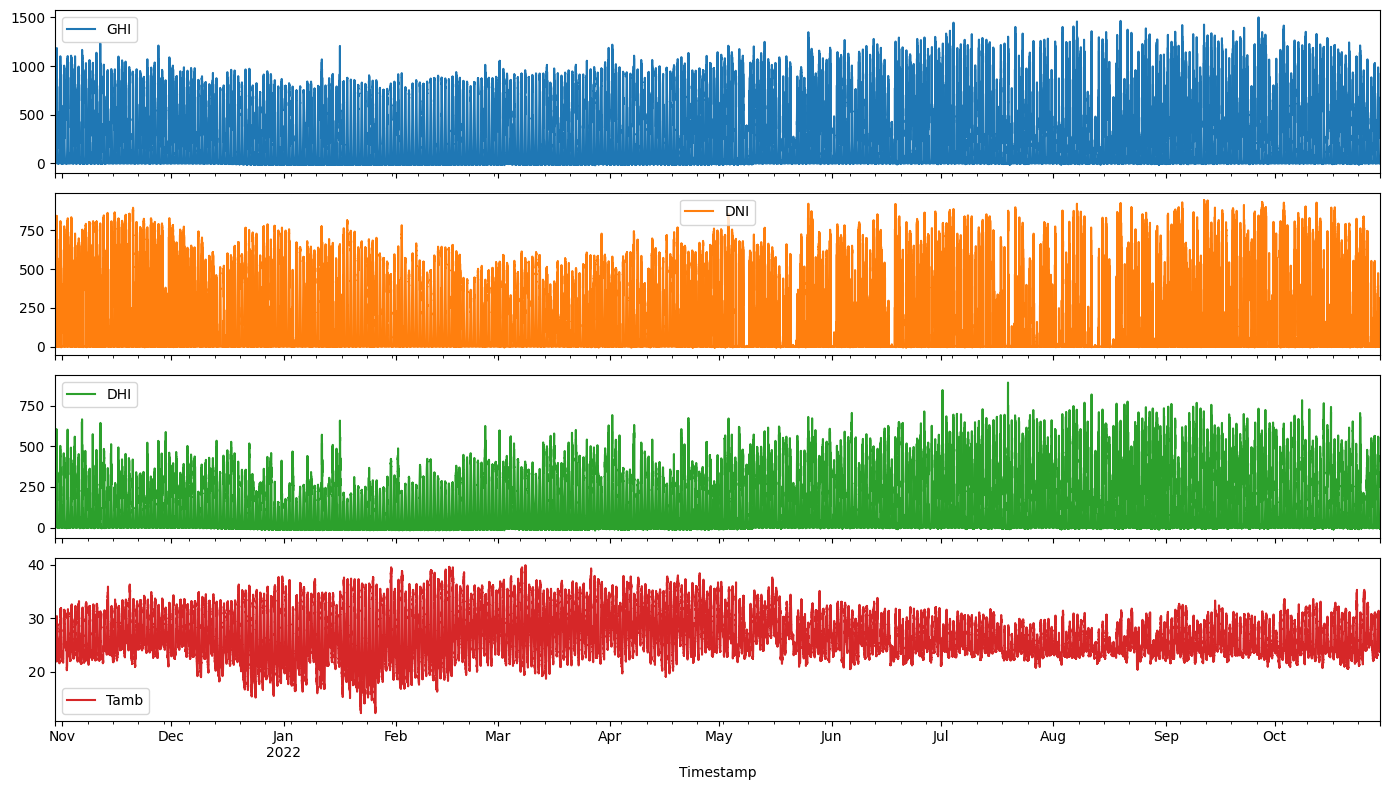

In [6]:
# Step D: Time Series Analysis
plot_time_series(df_cleaned, ["GHI", "DNI", "DHI", "Tamb"])


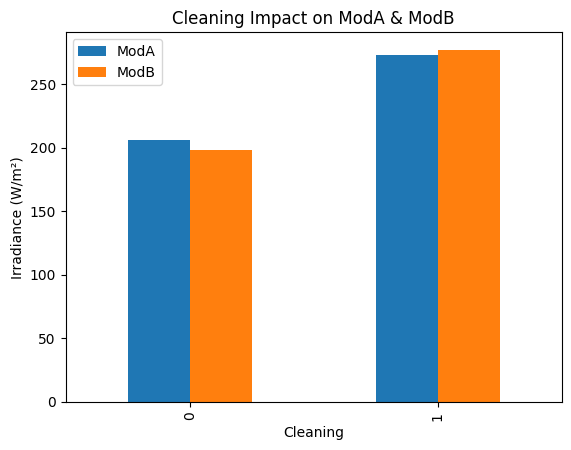

In [7]:
# Step E: Cleaning Impact
plot_cleaning_effect(df_cleaned)


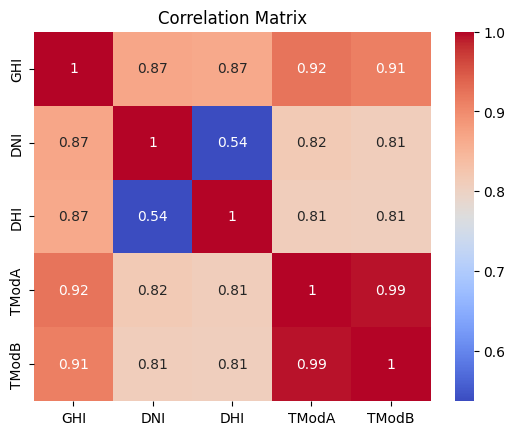

In [8]:
# Step F: Correlation Heatmap
plot_correlation_heatmap(df_cleaned, ["GHI", "DNI", "DHI", "TModA", "TModB"])


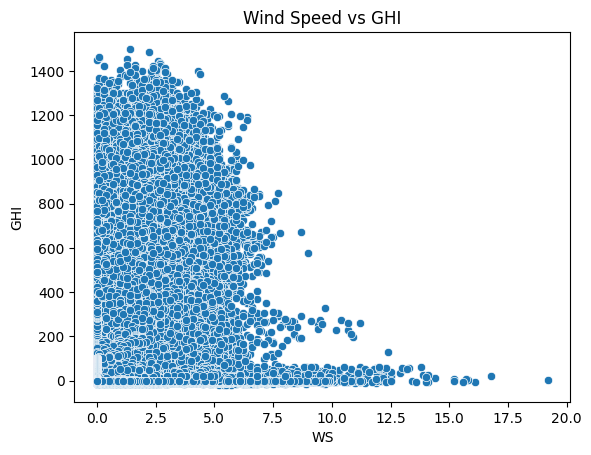

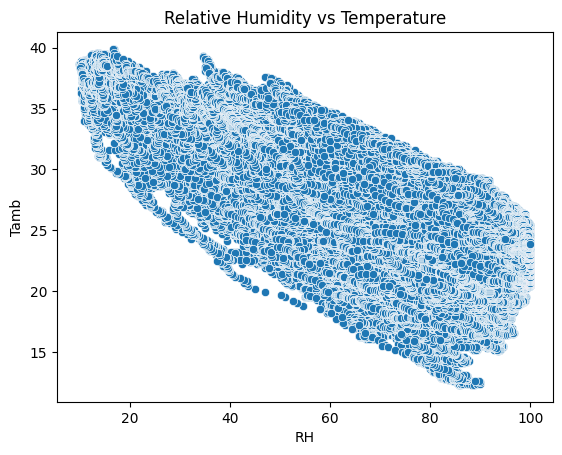

In [9]:
# Step G: Scatter Plots
plot_scatter(df_cleaned, "WS", "GHI", "Wind Speed vs GHI")
plot_scatter(df_cleaned, "RH", "Tamb", "Relative Humidity vs Temperature")


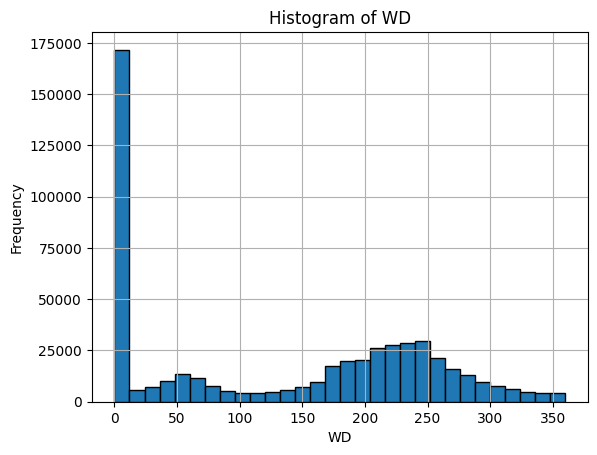

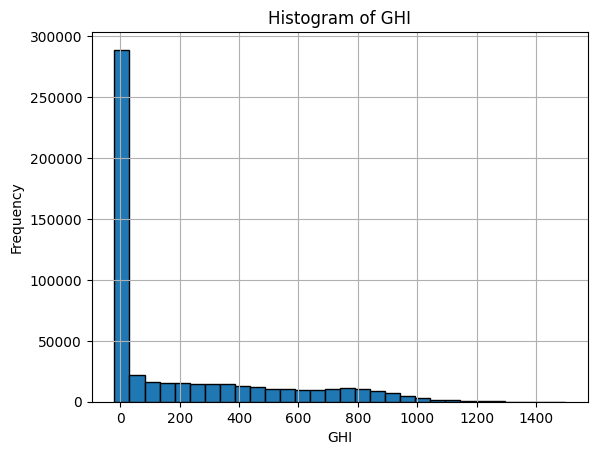

In [10]:
# Step H: Wind Distribution & Histogram
plot_histogram(df_cleaned, "WD")
plot_histogram(df_cleaned, "GHI")


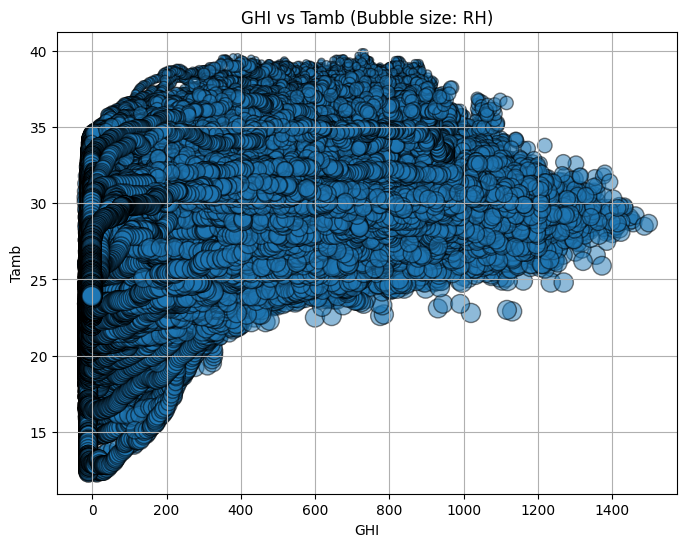

In [11]:
# Step I: Bubble Chart
plot_bubble_chart(df_cleaned, "GHI", "Tamb", "RH")
